## Importar librerias

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importar datasets

In [127]:
df_train1 = pd.read_csv('train1.csv')

In [128]:
df_train2 = pd.read_csv('train2.csv',delimiter=';')

In [129]:
df_train3 = pd.read_json('train3.json')

In [130]:
df_train4 = pd.read_json('train4.json')

In [131]:
df_train5= pd.read_json('train5.json')

In [158]:
df_train6 = pd.read_json('train6.json')

## Ingeniería de features

In [175]:
union = df_train3.append(df_train4).append(df_train5)

In [161]:
df_total = df_train1.append(df_train2).append(df_train3).append(df_train4).append(df_train5)

df_total.head()

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,...,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f,NaN,NaN,NaN
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,...,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963,NaN,NaN,NaN
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,...,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada,NaN,NaN,NaN
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,...,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2,NaN,NaN,NaN
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,...,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a,NaN,NaN,NaN


In [170]:
df_total = df_train1.append(df_train2).append(df_train3).append(df_train4).append(df_train5)
df_total = df_total.drop(['facilityName','FacilityInspireID','targetRelease',
                          'CONTINENT','REPORTER NAME','City','CITY ID','DAY',''],axis=1)

In [171]:
df_total

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,pollutant,reportingYear,MONTH,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,Germany,Mineral industry,Installations for the production of cement cli...,Carbon dioxide (CO2),2015,10,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,NaN,NaN
1,Italy,Mineral industry,Installations for the production of cement cli...,Nitrogen oxides (NOX),2018,9,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,NaN,NaN
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,Methane (CH4),2019,2,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,NaN,NaN
3,Czechia,Energy sector,Thermal power stations and other combustion in...,Nitrogen oxides (NOX),2012,8,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,NaN,NaN
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,Methane (CH4),2018,12,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,Cyprus,Energy sector,Thermal power stations and other combustion in...,Carbon dioxide (CO2),2008,1,13.475988,18.556476,22.852530,13.345801,12.410783,17.148327,0,1(c),1.0
9497,Finland,Energy sector,Thermal power stations and other combustion in...,Nitrogen oxides (NOX),2008,12,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,1(c),1.0
9498,Slovenia,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,Methane (CH4),2010,8,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,5(d),5.0
9499,Italy,Mineral industry,Underground mining and related operations,Nitrogen oxides (NOX),2014,1,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,3(a),3.0


In [189]:
def change_label(x,dictio):
    try:
        return dictio[x]
    except KeyError:
        pass

In [181]:
#Poner bien los activity codes

all_codes = list(union.groupby(['EPRTRAnnexIMainActivityCode','EPRTRAnnexIMainActivityLabel']).count().index.get_level_values(0))
all_labels=list(union.groupby(['EPRTRAnnexIMainActivityCode','EPRTRAnnexIMainActivityLabel']).count().index.get_level_values(1))

label_code = dict()
for i in range(len(all_codes)):
    label_code[all_labels[i]] = all_codes[i]
    
df_total['EPRTRAnnexIMainActivityCode'] = df_total['EPRTRAnnexIMainActivityLabel'].apply(lambda x: change_label(x,label_code))

In [184]:
#Poner bien los sector codes

sector_all_codes = list(df_total.groupby(['EPRTRSectorCode','eprtrSectorName']).count().index.get_level_values(0))
sector_all_labels=list(df_total.groupby(['EPRTRSectorCode','eprtrSectorName']).count().index.get_level_values(1))


sector_label_code = dict()
for i in range(len(sector_all_labels)):
    sector_label_code[sector_all_labels[i]] = sector_all_codes[i]
    
df_total['EPRTRSectorCode'] = df_total['eprtrSectorName'].apply(lambda x:change_label(x=x,dictio=sector_label_code))

In [187]:
#Execute this cell only once. Otherwise, you have to execute all cells above again to make it work

df_total.drop(['eprtrSectorName','EPRTRAnnexIMainActivityLabel'],axis=1,inplace=True)

In [188]:
df_total

,countryName,pollutant,reportingYear,MONTH,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,Germany,Carbon dioxide (CO2),2015,10,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,3(c)(i),3
1,Italy,Nitrogen oxides (NOX),2018,9,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,3(c),3
2,Spain,Methane (CH4),2019,2,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,5(d),5
3,Czechia,Nitrogen oxides (NOX),2012,8,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,1(c),1
4,Finland,Methane (CH4),2018,12,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,5(f),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,Cyprus,Carbon dioxide (CO2),2008,1,13.475988,18.556476,22.852530,13.345801,12.410783,17.148327,0,1(c),1
9497,Finland,Nitrogen oxides (NOX),2008,12,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,1(c),1
9498,Slovenia,Methane (CH4),2010,8,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,5(d),5
9499,Italy,Nitrogen oxides (NOX),2014,1,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,3(a),3


## Correlaciones

In [189]:
def categorize(x):
    if x ==df_train4['pollutant'].unique()[0]:
        return 0
    elif x ==df_train4['pollutant'].unique()[1]:
        return 1
    else:
        return 2

In [190]:
dict_cat = {'Carbon dioxide (CO2)':1,'Nitrogen oxides (NOX)':0,'Methane (CH4)':2}

df_total['pollutant'] = df_total['pollutant'].apply(lambda x:change_label(x=x,dictio=dict_cat))

In [255]:
corr =pd.get_dummies(data =df_total,columns=['EPRTRAnnexIMainActivityCode','pollutant'],drop_first=False).drop(['countryName', 'reportingYear', 'MONTH', 'max_wind_speed',
       'avg_wind_speed', 'min_wind_speed', 'max_temp', 'avg_temp', 'min_temp',
       'DAY WITH FOGS', 'EPRTRSectorCode'],axis=1).corr()[['pollutant_0','pollutant_1','pollutant_2']][:-3]

In [265]:
abs(corr['pollutant_0']).sort_values(ascending=False).head()

EPRTRAnnexIMainActivityCode_5(d)        0.324325
EPRTRAnnexIMainActivityCode_3(e)        0.175109
EPRTRAnnexIMainActivityCode_7(a)(ii)    0.111929
EPRTRAnnexIMainActivityCode_1(c)        0.105354
EPRTRAnnexIMainActivityCode_6(b)        0.078349
Name: pollutant_0, dtype: float64

In [273]:
most_corr = pd.DataFrame()

most_corr['pollutant_1'] = abs(corr['pollutant_1']).sort_values(ascending=False).values
most_corr['code_1'] = abs(corr['pollutant_1']).sort_values(ascending=False).index
most_corr['code_1'] = most_corr['code_1'].apply(lambda x: x.split('_')[1])


most_corr['pollutant_2'] = abs(corr['pollutant_2']).sort_values(ascending=False).values
most_corr['code_2'] = abs(corr['pollutant_2']).sort_values(ascending=False).index
most_corr['code_2'] = most_corr['code_2'].apply(lambda x: x.split('_')[1])


most_corr['pollutant_0'] = abs(corr['pollutant_0']).sort_values(ascending=False).values
most_corr['code_0'] = abs(corr['pollutant_0']).sort_values(ascending=False).index
most_corr['code_0'] = most_corr['code_0'].apply(lambda x: x.split('_')[1])


In [277]:
most_corr[['pollutant_1','code_1']].head(10)

,pollutant_1,code_1
0,0.307702,5(d)
1,0.141504,1(c)
2,0.109082,5(b)
3,0.101410,7(a)(ii)
4,0.071667,3(e)
5,0.071094,3(c)(i)
6,0.067067,5(c)
7,0.064056,3(c)
8,0.063417,3(c)(iii)
9,0.058099,7(a)


In [278]:
most_corr[['pollutant_0','code_0']].head(10)

,pollutant_0,code_0
0,0.324325,5(d)
1,0.175109,3(e)
2,0.111929,7(a)(ii)
3,0.105354,1(c)
4,0.078349,6(b)
5,0.075095,5(c)
6,0.064943,3(g)
7,0.064108,7(a)
8,0.059454,7(a)(iii)
9,0.049979,3(c)(i)


In [279]:
most_corr[['pollutant_2','code_2']].head(10)

,pollutant_2,code_2
0,0.701335,5(d)
1,0.273335,1(c)
2,0.236802,7(a)(ii)
3,0.157811,5(c)
4,0.135647,7(a)
5,0.134012,3(c)(i)
6,0.131175,5(b)
7,0.127044,7(a)(iii)
8,0.118177,3(e)
9,0.111912,3(a)


In [197]:
df_total_dummies = pd.get_dummies(data=df_total,columns=['countryName','reportingYear','MONTH','EPRTRAnnexIMainActivityCode','EPRTRSectorCode'],drop_first=True)

In [280]:
df_total_dummies

,pollutant,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,countryName_Belgium,countryName_Bulgaria,...,EPRTRAnnexIMainActivityCode_9(d),EPRTRAnnexIMainActivityCode_9(e),EPRTRSectorCode_2,EPRTRSectorCode_3,EPRTRSectorCode_4,EPRTRSectorCode_5,EPRTRSectorCode_6,EPRTRSectorCode_7,EPRTRSectorCode_8,EPRTRSectorCode_9
0,1,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,1,13.475988,18.556476,22.852530,13.345801,12.410783,17.148327,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9497,0,8.815939,14.461703,20.553781,3.820281,3.763833,5.657107,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9498,2,14.793298,16.688049,20.411498,17.285365,18.349798,21.538441,2,0,0,...,0,0,0,0,0,1,0,0,0,0
9499,0,14.911317,16.144091,22.647192,6.387199,6.176238,9.269076,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Modelo

In [226]:
from sklearn.model_selection import train_test_split

X= df_total_dummies.drop('pollutant',axis=1)
y = df_total_dummies['pollutant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [205]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101)

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred,digits=3))

[[5233 2366  201]
 [2987 3795  117]
 [ 387  318 4285]]


              precision    recall  f1-score   support

           0      0.608     0.671     0.638      7800
           1      0.586     0.550     0.567      6899
           2      0.931     0.859     0.893      4990

    accuracy                          0.676     19689
   macro avg      0.708     0.693     0.700     19689
weighted avg      0.682     0.676     0.678     19689



In [224]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

va por el paso  1 / 62
va por el paso  9 / 62
va por el paso  17 / 62
va por el paso  25 / 62
va por el paso  33 / 62
va por el paso  41 / 62
va por el paso  49 / 62
va por el paso  57 / 62


Text(0, 0.5, 'Mean f1 Score')

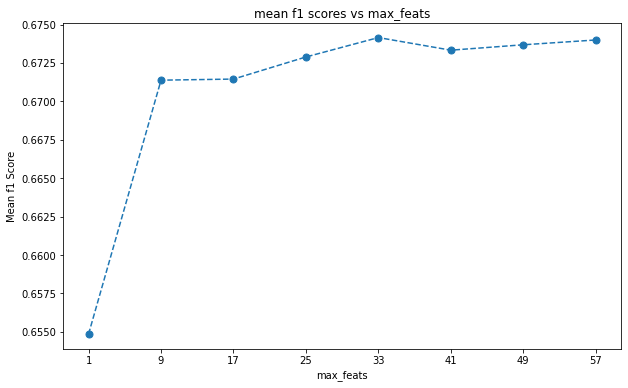

In [281]:
mean_scores_nfeats=[]

feats=62
jump=8

for i in range(1,feats+1,jump):
    print('va por el paso ', i,'/',feats)
    internal_list= []
    for j in range(3):
        rfc = RandomForestClassifier(n_estimators=5,max_features=i,)
        internal_list.append(np.mean(cross_val_score(rfc, X_train, y_train, cv=5,scoring='f1_macro')))
    
    mean_scores_nfeats.append(np.mean(internal_list))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,feats+1,jump),mean_scores_nfeats,linestyle='dashed',marker='o',markersize=7)
plt.xticks(range(1,feats+1,jump))
plt.title('mean f1 scores vs max_feats')
plt.xlabel('max_feats') ; plt.ylabel('Mean f1 Score')    

In [206]:
from sklearn.multiclass import OneVsRestClassifier
rfc = RandomForestClassifier(random_state=101)

one_vs_all_forest = OneVsRestClassifier(rfc)

one_vs_all_forest.fit(X_train,y_train)

rfc_pred = one_vs_all_forest.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred,digits=3))

[[5134 2459  207]
 [2887 3880  132]
 [ 378  323 4289]]


              precision    recall  f1-score   support

           0      0.611     0.658     0.634      7800
           1      0.582     0.562     0.572      6899
           2      0.927     0.860     0.892      4990

    accuracy                          0.676     19689
   macro avg      0.707     0.693     0.699     19689
weighted avg      0.681     0.676     0.678     19689



In [209]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)


knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred,digits=3))

[[4711 2615  474]
 [3723 2731  445]
 [1245  736 3009]]


              precision    recall  f1-score   support

           0      0.487     0.604     0.539      7800
           1      0.449     0.396     0.421      6899
           2      0.766     0.603     0.675      4990

    accuracy                          0.531     19689
   macro avg      0.567     0.534     0.545     19689
weighted avg      0.544     0.531     0.532     19689



## Predicciones

In [304]:
df_test = pd.read_csv('test_x.csv')
df_test = df_test.drop(['test_index','EPRTRAnnexIMainActivityLabel','eprtrSectorName','facilityName','FacilityInspireID','targetRelease','CONTINENT','REPORTER NAME','City','CITY ID','DAY'],axis=1)

In [327]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101)

rfc.fit(X,y)



RandomForestClassifier(random_state=101)

In [328]:
df_test_dummies = pd.get_dummies(data=df_test,columns=['countryName','reportingYear','MONTH','EPRTRAnnexIMainActivityCode','EPRTRSectorCode'],drop_first=True)

In [329]:
predictions = rfc.predict(df_test_dummies)

predictions = pd.DataFrame(predictions,columns=['pollutant'])

In [330]:
predictions.to_csv('predictions.csv',index=True,index_label='test_index')

In [331]:
pred = pd.read_csv('predictions.csv')

In [332]:
pred.to_json('predictions.json')